In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2022-03-09 14:08:44.801901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 14:08:44.801931: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [5]:
class_names[y_train[0]]

'Coat'

2022-03-08 22:35:49.572621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-08 22:35:49.572664: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-08 22:35:49.572692: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-03-08 22:35:49.573843: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6398 - accuracy: 0.7739 - val_loss: 0.4421 - val_accuracy: 0.8344
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4779 - accuracy: 0.8268 - val_loss: 0.3921 - val_accuracy: 0.8574
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4408 - accuracy: 0.8394 - val_loss: 0.3738 - val_accuracy: 0.8602
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4185 - accuracy: 0.8474 - val_loss: 0.3734 - val_accuracy: 0.8604
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4035 - accuracy: 0.8518 - val_loss: 0.3645 - val_accuracy: 0.8618
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3883 - accuracy: 0.8574 - val_loss: 0.3489 - val_accuracy: 0.8746
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8638 - val_loss: 0.3538 - val_accuracy:

<AxesSubplot:>

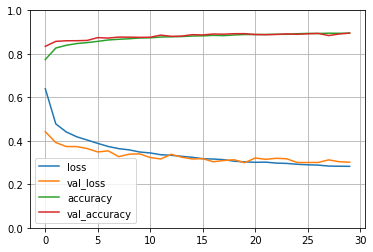

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_full.shape[1:]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True,
    ),
]

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot(grid=True, ylim=(0.0, 1.0))

Epoch 1/50
1719/1719 [==============================] - 664s 386ms/step - loss: 0.5459 - accuracy: 0.7983 - val_loss: 0.3827 - val_accuracy: 0.8644
Epoch 2/50
1719/1719 [==============================] - 665s 387ms/step - loss: 0.3347 - accuracy: 0.8779 - val_loss: 0.3364 - val_accuracy: 0.8768
Epoch 3/50
1719/1719 [==============================] - 664s 386ms/step - loss: 0.2892 - accuracy: 0.8931 - val_loss: 0.2664 - val_accuracy: 0.8962
Epoch 4/50
1719/1719 [==============================] - 686s 399ms/step - loss: 0.2601 - accuracy: 0.9043 - val_loss: 0.2637 - val_accuracy: 0.9042
Epoch 5/50
1719/1719 [==============================] - 704s 409ms/step - loss: 0.2376 - accuracy: 0.9120 - val_loss: 0.2605 - val_accuracy: 0.9044
Epoch 6/50
1719/1719 [==============================] - 709s 412ms/step - loss: 0.2175 - accuracy: 0.9194 - val_loss: 0.2507 - val_accuracy: 0.9110
Epoch 7/50
1719/1719 [==============================] - 734s 427ms/step - loss: 0.2010 - accuracy: 0.9264 - val_

<AxesSubplot:>

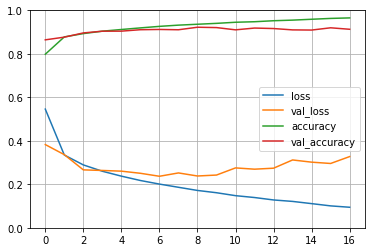

In [7]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(96, 5, activation='relu', padding='valid', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(6, strides=2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, strides=2),
    keras.layers.Conv2D(384, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(384, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True,
    ),
]

cnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = cnn_model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot(grid=True, ylim=(0.0, 1.0))

2022-03-09 14:10:55.970580: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/50


2022-03-09 14:11:02.349872: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22127616 exceeds 10% of free system memory.
2022-03-09 14:11:02.349910: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22127616 exceeds 10% of free system memory.
2022-03-09 14:11:02.381686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22127616 exceeds 10% of free system memory.
2022-03-09 14:11:02.381895: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22127616 exceeds 10% of free system memory.


1719/1719 [==============================] - 4439s 3s/step - loss: 0.4689 - accuracy: 0.8364 - val_loss: 0.3199 - val_accuracy: 0.8868
Epoch 2/50
1719/1719 [==============================] - 4116s 2s/step - loss: 0.3201 - accuracy: 0.8858 - val_loss: 0.2665 - val_accuracy: 0.9072
Epoch 3/50
1719/1719 [==============================] - 4607s 3s/step - loss: 0.2776 - accuracy: 0.9010 - val_loss: 0.2609 - val_accuracy: 0.9046
Epoch 4/50
1719/1719 [==============================] - 4079s 2s/step - loss: 0.2433 - accuracy: 0.9129 - val_loss: 0.2318 - val_accuracy: 0.9144
Epoch 5/50
1719/1719 [==============================] - 4122s 2s/step - loss: 0.2348 - accuracy: 0.9174 - val_loss: 0.2253 - val_accuracy: 0.9148
Epoch 6/50
1719/1719 [==============================] - 4726s 3s/step - loss: 0.1920 - accuracy: 0.9304 - val_loss: 0.2196 - val_accuracy: 0.9170
Epoch 7/50
1719/1719 [==============================] - 4965s 3s/step - loss: 0.1750 - accuracy: 0.9370 - val_loss: 0.2350 - val_accura

<AxesSubplot:>

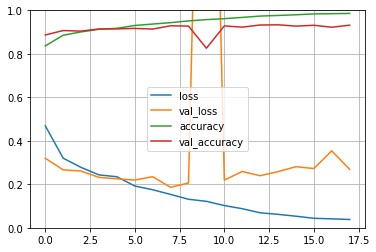

In [7]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding='same', use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding='same', use_bias=False),
            keras.layers.BatchNormalization(),
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding='same', use_bias=False),
                keras.layers.BatchNormalization(),
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(Z)
        return self.activation(Z + skip_Z)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 5, strides=1, input_shape=[28, 28, 1], padding='same', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True,
    ),
]

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot(grid=True, ylim=(0.0, 1.0))

In [8]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

def build_model(n_hidden=1, n_neurons=30, input_shape=X_train_full.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Flatten())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
        model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )
    return model

params = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
}

model_search_cv = RandomizedSearchCV(
    keras.wrappers.scikit_learn.KerasClassifier(build_model),
    params,
    n_iter=1,
    cv=3,
)
model_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)



/tmp/ipykernel_722334/1505965242.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras.wrappers.scikit_learn.KerasClassifier(build_model),


Epoch 1/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.6631 - accuracy: 0.7652 - val_loss: 0.4446 - val_accuracy: 0.8462
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4686 - accuracy: 0.8331 - val_loss: 0.3994 - val_accuracy: 0.8568
Epoch 3/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.4299 - accuracy: 0.8429 - val_loss: 0.3706 - val_accuracy: 0.8662
Epoch 4/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.3975 - accuracy: 0.8568 - val_loss: 0.3668 - val_accuracy: 0.8680
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.3827 - accuracy: 0.8612 - val_loss: 0.3450 - val_accuracy: 0.8794
Epoch 6/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.3712 - accuracy: 0.8636 - val_loss: 0.3378 - val_accuracy: 0.8790
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 0.3582 - accuracy: 0.8687 - val_loss: 0.3306 - val_ac

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f87d01b2760>,
                   n_iter=1,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [9]:
model_search_cv.best_params_

{'n_neurons': 73, 'n_hidden': 2}

In [10]:
model_search_cv.best_score_

0.887072761853536